In [1]:
import tensorflow as tf
from functionsTF import *

%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import seaborn as sns
#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [2]:
N = 400
T = 4000

In [3]:
disp = False
tauv = 15
sG = 30
N = 2000

### input 1: apple
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out = gpu.vvm[-1000:]

328.52


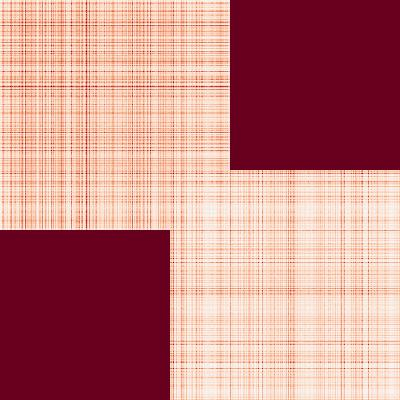

18.94


In [17]:
disp = False
tauv = 15
sG = 30

### input 1: apple
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out = gpu.vvm[-1000:]


### input 1: apple N200
gpu = Tfnet(N=N//2,T=T, disp=disp, tauv=tauv, sG=sG)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out_200 = gpu.vvm[-1000:]


### input 2: pear
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG)
np.random.seed(3)
pear = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = pear
gpu.runTFSimul()
pear_out = gpu.vvm[-1000:]

disp=True
tauv = 45
sG = 30

### input 1: apple
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out_45 = gpu.vvm[-1000:]


### input 1: apple N200
gpu = Tfnet(N=N//2,T=T, disp=disp, tauv=tauv, sG=sG)
np.random.seed(2)
apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = apple
gpu.runTFSimul()
apple_out_200_45 = gpu.vvm[-1000:]


### input 2: pear
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG)
np.random.seed(3)
pear = np.random.randint(0, 2, size=(T,1), dtype='int32')
gpu.input = pear
gpu.runTFSimul()
pear_out_45 = gpu.vvm[-1000:]

(0, 100)

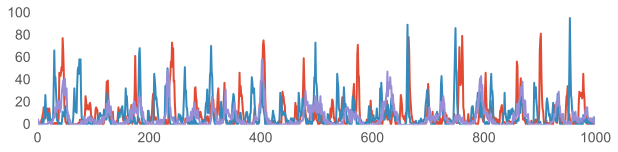

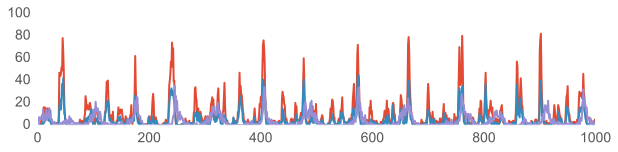

In [14]:
plt.figure(figsize=(10,2))
plt.plot(apple_out)
plt.plot(pear_out)
plt.plot(pear_out_45)
plt.ylim([0,100])

plt.figure(figsize=(10,2))
plt.plot(apple_out)
plt.plot(apple_out_200)
plt.plot(apple_out_200_45)
plt.ylim([0,100])

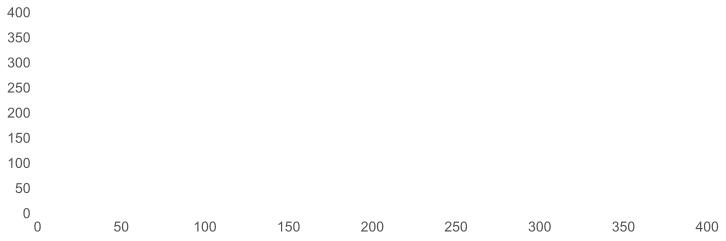

In [5]:
sp = tf.convert_to_tensor(gpu.spikes).eval()
plt.figure(figsize=(12,4))
extent=[0,T,0,N]
plt.imshow(sp.transpose(), extent=extent, aspect=0.3*(extent[1] - extent[0]) / (
            extent[3] - extent[2]))

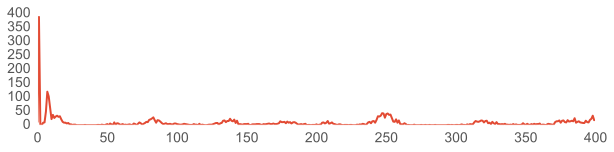

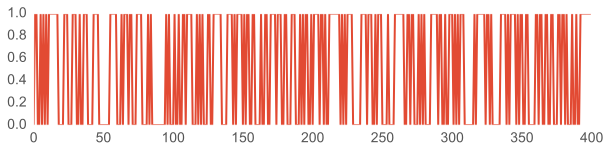

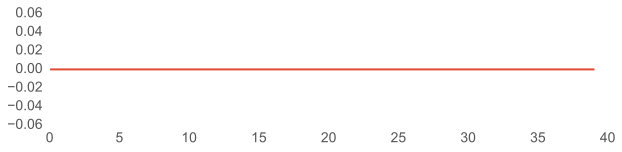

In [6]:
plt.figure(figsize=(10,2))
plt.plot(gpu.vvm[-1000:])
plt.figure(figsize=(10,2))
plt.plot(apple)
plt.figure(figsize=(10,2))
plt.plot(np.array(gpu.gamma)*N**2)

NameError: name 'vm' is not defined

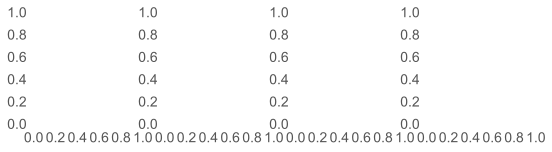

In [7]:
fig = plt.figure(figsize=(9,2))
ax0 = fig.add_subplot(141)
ax1 = fig.add_subplot(142)
ax2 = fig.add_subplot(143)
ax3 = fig.add_subplot(144)

ax0.plot(vm)

ax1.plot(um)
ax1.set_title('adaptation')

ax2.plot(vvm)
ax2.set_title('spiking')

ax3.plot(im)
ax3.set_title('current')

In [ ]:
T=100
np.random.seed(2)
apple = np.random.randint(0,2, size=(T,1))
np.random.seed(3)
pear = np.random.randint(0,2, size=T)


fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(apple, c='r')
ax.set_ylim([0,1.2])
ax.set_title('Apple')

ax2.plot(pear, c='y')
ax2.set_ylim([0,1.2])
ax2.set_title('Pear')

In [ ]:
_apple = np.random.randint(0, 2, size=(T,1), dtype='int32')
apple = tf.constant(_apple)

input = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
apple[0,100]

In [ ]:
tf.gather(apple, 10)